# Tugas Besar IF2220 Probabilitas dan Statistika

Author: Kenneth Ezekiel Suprantoni (13521089), Akbar Maulana Ridho (13521093) (Kelompok 11 K01)

## Analisis Statistika

1) Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.
2) Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.
3) Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.
4) Melakukan test hipotesis 1 sampel,
    - a. Nilai rata-rata pH di atas 3.29?
    - b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
    - c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
    - d. Nilai rata-rata total sulfur dioxide di bawah 35?
    - e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?
5) Melakukan test hipotesis 2 sampel,
    - a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
    - b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
    - c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
    - d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
    - e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest

data = pd.read_csv('/data/notebook_files/anggur.csv')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000


## 1. Menulis Deskripsi Statistika dari semua kolom pada data yang bersifat numerik

* Mean
* Median
* Modus
* Standar Deviasi
* Variansi
* Range
* Nilai Minimum
* Nilai Maksimum
* Kuartil
* Inter-quartile Range
* Skewness
* Kurtosis

In [2]:
dataframe_dict = {
    "Mean":data.mean(),
    "Median":data.median(),
    "Mode":[data.round(2).mode(dropna=True)[x].tolist() for x in data],
    "Standard Deviation":data.std(),
    "Variance":data.var(),
    "Range":data.max() - data.min(),
    "Min":data.min(),
    "Max":data.max(),
    "Q1":data.quantile(0.25),
    "Q2":data.quantile(0.5),
    "Q3":data.quantile(0.75),
    "IQR":data.quantile(0.75) - data.quantile(0.25),
    "Skewness":data.skew(),
    "Kurtosis":data.kurtosis()
}

print("Data Description:")
print("Note: mode is rounded to two decimals to maximize accuracy of mode and nan signifies no more value")
dataframe_dict = pd.DataFrame(dataframe_dict).transpose()
dataframe_dict

Data Description:
Note: mode is rounded to two decimals to maximize accuracy of mode and nan signifies no more value


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Mean,7.15253,0.520839,0.270517,2.567104,0.081195,14.907679,40.29015,0.995925,3.30361,0.59839,10.59228,7.958
Median,7.15,0.52485,0.2722,2.51943,0.082167,14.860346,40.19,0.996,3.3,0.595,10.61,8.0
Mode,"[6.54, nan, nan, nan, nan, nan, nan]","[0.54, nan, nan, nan, nan, nan, nan]","[0.27, nan, nan, nan, nan, nan, nan]","[2.67, 2.94, nan, nan, nan, nan, nan]","[0.09, nan, nan, nan, nan, nan, nan]","[13.21, nan, nan, nan, nan, nan, nan]","[35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51]","[1.0, nan, nan, nan, nan, nan, nan]","[3.34, nan, nan, nan, nan, nan, nan]","[0.59, nan, nan, nan, nan, nan, nan]","[9.86, 10.31, nan, nan, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]"
Standard Deviation,1.201598,0.095848,0.049098,0.987915,0.020111,4.8881,9.965767,0.00202,0.104875,0.100819,1.510706,0.902802
Variance,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051
Range,8.17,0.6652,0.2929,5.5182,0.125635,27.267847,66.81,0.0138,0.74,0.67,8.99,5.0
Min,3.32,0.1399,0.1167,0.032555,0.015122,0.194679,3.15,0.9888,2.97,0.29,6.03,5.0
Max,11.49,0.8051,0.4096,5.550755,0.140758,27.462525,69.96,1.0026,3.71,0.96,15.02,10.0
Q1,6.3775,0.4561,0.2378,1.89633,0.066574,11.426717,33.785,0.9946,3.23,0.53,9.56,7.0
Q2,7.15,0.52485,0.2722,2.51943,0.082167,14.860346,40.19,0.996,3.3,0.595,10.61,8.0


## 2. Visualisasi Data

Visualisasi data dilakukan per kolom atau atribut, yang dibagi menjadi histogram dan boxplot.

Urutan atribut akan berubah dari urutan pada tabel utama, karena terdapat sorting sehingga urutan pertama adalah atribut dengan mean terkecil.
Urutan atributnya adalah sebagai berikut:

* Chlorides
* Citric acid
* Volatile acidity
* Sulphates
* Density
* Residual sugar
* pH
* Fixed acidity
* Quality
* Alcohol
* Free sulphur dioxide
* Total sulphur dioxide

In [3]:
# sort column order by mean values ascending
data = data.reindex(data.mean().sort_values().index, axis=1)

def plot_attribute(data ,attr):
  fig, axes = plt.subplots(1, 2)
  data[attr].plot(kind='hist',edgecolor='black', ax=axes[0], figsize=(10,6), title="Histogram "+attr, bins=15)
  data.boxplot(attr, ax=axes[1]).set_title("Boxplot " + attr)
    
def plot_discrete_attribute(data ,attr):
  fig, axes = plt.subplots(1, 2)
  data[attr].plot(kind='hist',edgecolor='black', ax=axes[0], figsize=(10,6), title="Histogram "+attr)
  data.boxplot(attr, ax=axes[1]).set_title("Boxplot " + attr)

### Chlorides

Kolom chlorides yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Chlorides memiliki range 0.12 dengan jarak antarkuartil 0.027 dan frekuensi terbesar terdapat pada range sekitar 0.09 sampai 0.1.

Sekilas, tampak bahwa histogram Chlorides memiliki negative skewness, hal ini didukung juga dengan keberadaan mean (0.081) yang berada dibawah mode (0.09) dan ditengahi oleh median (0.082). Atribut chlorides hanya memiliki sedikit pencilan (Pencilan adalah data yang berada diluar kuartil pertama dan ketiga).

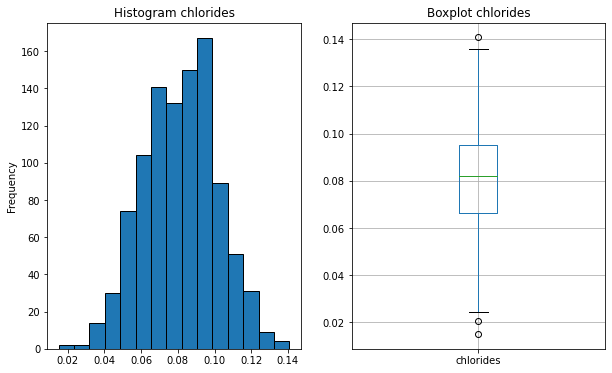

In [4]:
plot_attribute(data, 'chlorides')

### Citric acid

Kolom citric acid yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Kolom citric acid memiliki range sebesar 0.29, dengan jarak antarkuartilnya yang kecil (0.06) dan memiliki frekuensi tertinggi pada range sekitar 0.25 sampai 0.275 di 160.

Sekilas, tampak bahwa histogram citric acid memiliki negative skewness, hal ini juga didukung oleh data skewness citric acid (-0.04). Terdapat beberapa pencilan pada boxplot citric acid, dengan frekuensi pencilan lebih banyak berada di bawah Q1-1.5IQR dibanding diatas Q3+1.5IQR.

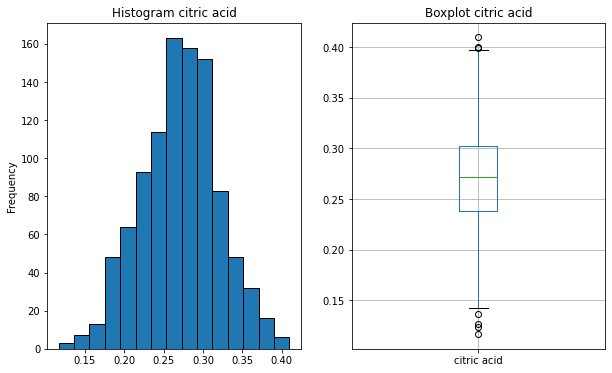

In [5]:
plot_attribute(data, 'citric acid')

### Volatile acidity

Kolom citric acid yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Kolom volatile acidity memiliki range sebesar 0.06, dengan jarak antarkuartilnya sebesar 0.129 dan frekuensi terbesar berada pada range 0.55-0.6. 

Sekilas terlihat bahwa histogram memiliki negative skewness walau memiliki ekor yang lebih panjang di < 0.55, hal ini didukung dengan skewnessnya yang bernilai -0.19 dan mean 0.52 < median 0.524 < mode 0.54. Volatile Acidity juga memiliki outliers yang kebanyakan berada di bawah range Q1 - 1.5IQR.

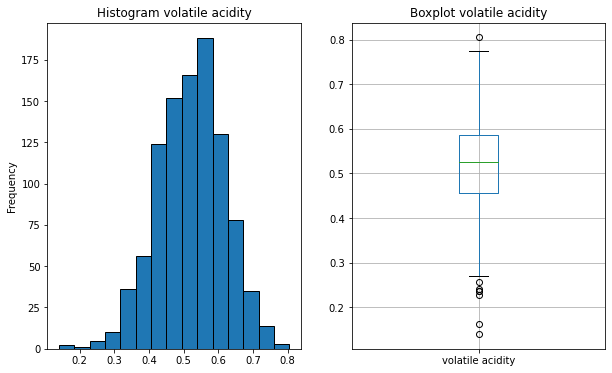

In [6]:
plot_attribute(data, 'volatile acidity')

### Sulphates

Kolom sulphates yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram. 

Kolom ini memiliki range sebesar 0.67 dengan jarak antar kuartil 0.14, dan frekuensi terbesar berada pada range 0.55-0.6.


Skewness dari histogram diperkirakan positif dari bentuknya dan dapat dikonfirmasi bahwa skewness suplhates bernilai 0.15.
Dapat dilihat juga, pencilan terdapat lebih banyak pada Q3+1.5IQR.

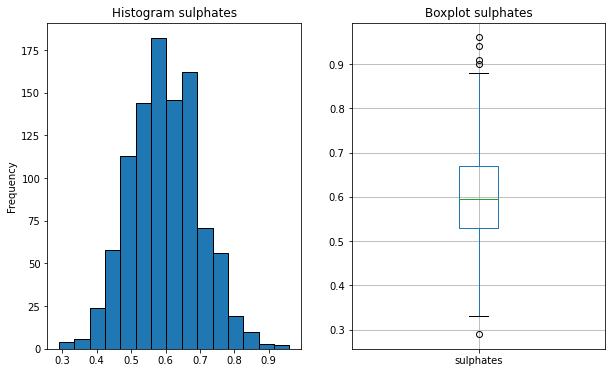

In [7]:
plot_attribute(data, 'sulphates')

### Density

Kolom density yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Atribut ini memiliki range 0.013 dengan jarak antarkuartil sebesar 0.002 dan frekuensi terbesar pada range 0.995-0.996 tetapi diikuti dengan range 0.996-0.997 yang memiliki frekuensi yang tidak jauh. Nilai kolom ini paling tidak tersebar seperti kolom lainnya. 

Kolom ini memiliki skewness negatif, sehingga bentuknya condong ke kanan, hal ini dapat dibuktikan dengan statistik skewness atribut density yang bernilai -0.0768. 

Pencilan yang terdapat pada Q3+1.5IQR berada lebih tersebar jika dibandingkan dengan pencilan yang berada di Q1-1.5IQR

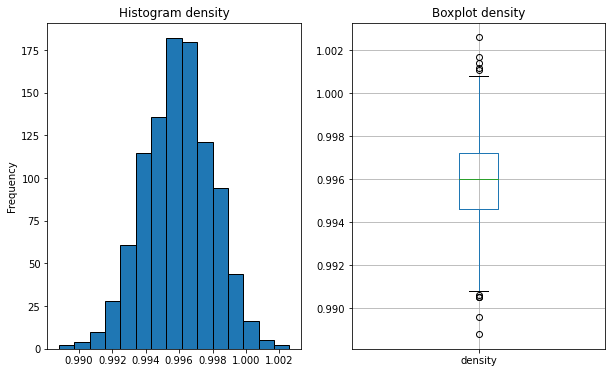

In [8]:
plot_attribute(data, 'density')

### Residual sugar

Kolom residual sugar yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Atribut ini memiliki range sebesar 5.5, dengan jarak antarkuartilnya yang kecil bila dibandingkan dengan range, yakni sebesar 1.3 dan memiliki frekuensi terbesar pada sekitar range 2.33-2.66

Pencilan pada atribut ini berada di atas range Q3 + 1.5IQR. Data pada kolom ini cenderung tersebar jauh yang terlihat pada nilai range-nya yang besar. Kolom ini memiliki skewness positif, sehingga bentuknya condong ke kiri, hal ini dapat dilihat dari statistik skewness residual sugar yang bernilai 0.13, tetapi karena skewness tidak terlalu besar maka dapat didekati dengan distribusi simetris.

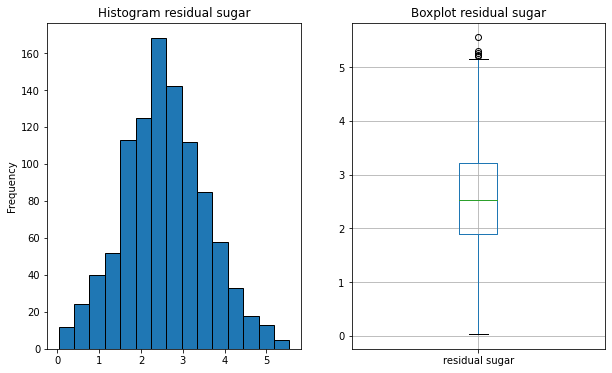

In [9]:
plot_attribute(data, 'residual sugar')

### pH

Kolom pH yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Atribut ini memiliki range 0.739 dengan IQR 0.14, yang menunjukkan bahwa data tersebut lebih tersebar secara terpusat di titik tengah atau sekitar kuartil kedua. Frekuensi tertinggi pada atribut ini terdapat pada sekitar range 3.2-3.4.

Tampak bahwa grafik histogram memiliki skewness positif karena lebih condong ke kiri alias data lebih terkumpul di kiri (value mode < value median < value mean) dengan skewness 0.147. Tetapi dapat diperhatikan bahwa condong dari grafik tidak terlalu signifikan, sehingga bisa juga didekati distribusi simetris, dapat ditunjukkan juga dengan skewness yang mendekati nilai 0 dan value mode = value median = value mean (dalam pembulatan 1 desimal).

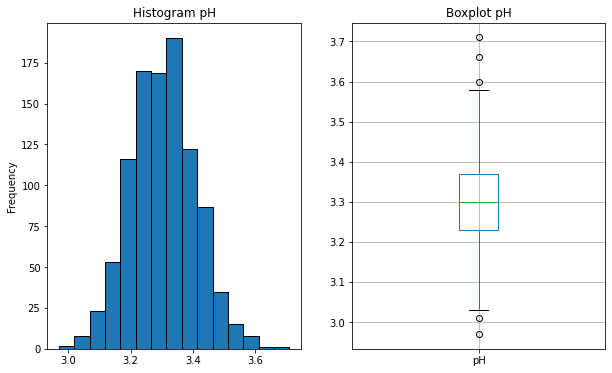

In [10]:
plot_attribute(data, 'pH')

### Fixed acidity

Kolom Fixed acidity yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Atribut ini memiliki range 8.17, dengan Jarak antarkuartil 1.62. Dapat dilihat bahwa frekuensi tertinggi berada pada sekitar 6.5 sampai 8. Terdapat perbedaan frekuensi yang drastis antara kedua frekuensi tertinggi dan frekuensi lainnya, hal ini disebabkan oleh data yang terpusat pada titik tengah.

Pada grafik histogram, tampak sekilas bahwa grafik memiliki symmetrical distribution, dilihat dari statistik skewness nya, fixed acidity mempunyai skewness sebesar -0.02 yang berarti memiliki skewness negatif. Tetapi karena skewness cukup kecil maka tidak terlalu tampak pada grafik histogram sebagai negative skewness.

Pencilan yang terdapat pada grafik boxplot juga sekilas terlihat identik secara jumlah dan letak, dengan pencilan pada Q1-1.5IQR lebih dekat satu sama lain.

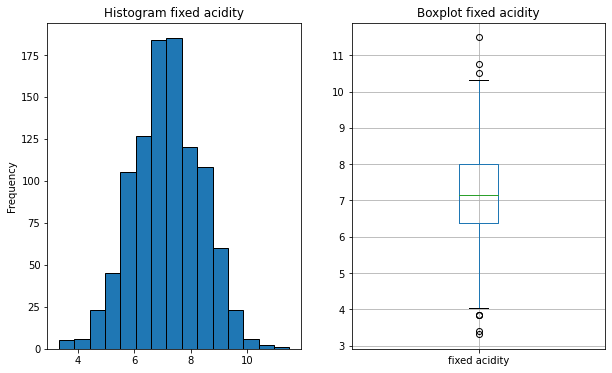

In [11]:
plot_attribute(data, 'fixed acidity')

### Quality

Kolom Quality yang memiliki data diskrit, sehingga akan di plot sesuai dengan value datanya.

Atribut ini memiliki range 5 dengan IQR 5, dan frekuensi tertinggi ada di 8.

Sekilas tampak seperti quality memiliki histogram dengan negative skewness, hal ini disebabkan oleh data bernilai 10 yang di plot di bagian kiri nilainya, walau sebenarnya memang benar data tersebut memiliki negative skewness, nyatanya skewness nya hanya bernilai -0.089.

Tidak terdapat pencilan pada data quality seperti yang terlihat dalam boxplot.


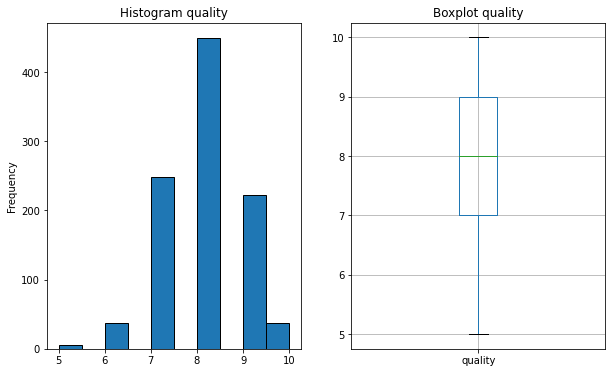

In [12]:
plot_discrete_attribute(data, 'quality')

### Alcohol

Kolom Alcohol yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Atribut Alkohol memiliki range 8.99 dengan IQR 2.0625 dan frekuensi tertinggi ada pada sekitar range 10-11.

Sekilas tampak data ini berdistribusi simetris, tetapi kenyataannya data ini memiliki skewness -0.018, meski relatif kecil.

Pencilan pada kolom alcohol terdapat paling banyak pada Q1-1.5IQR.

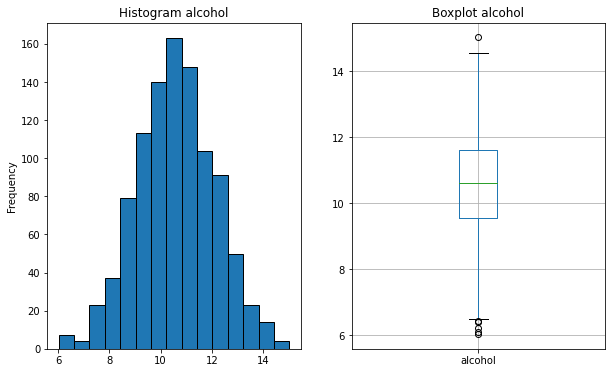

In [13]:
plot_attribute(data, 'alcohol')

### Free Sulfur Dioxide

Kolom Free Sulfur Dioxide yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Atribut ini memiliki range sebesar 27.267847 dan IQR sebesar 6.88 dengan frekuensi terbesar berada di sekitar 15-16.

Pada histogram, tampak bahwa data berdistribusi simetris dengan ekor yang lebih panjang di bagian kiri, hal tersebut didukung juga oleh skewness yang cukup kecil yakni 0.007.

Pencilan pada kolom free sulfur dioxode hanya ada di Q1-1.5IQR yang berada dekat satu dengan yang lain.

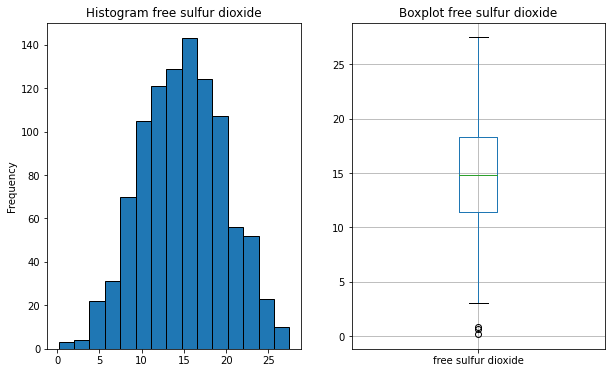

In [14]:
plot_attribute(data, "free sulfur dioxide")

### Total Sulfur Dioxide

Kolom Total Sulfur Dioxide yang memiliki data desimal yang kontinu akan didekati dengan 15 bagian yang sama lebar, sehingga terjadi pendekatan diskrit pada data kontinu pada histogram.

Atribut ini memiliki range sebesar 66.81 dan IQR sebesar 13.23, dengan frekuensi terbesar berada pada range sekitar 35-40.

Tampak sekilas pada grafik histogram bahwa atribut ini memiliki skewness negatif, walau tidak terlalu besar. Hal ini dapat dibuktikan dengan statistik skewness total sulfur dioxide yang bernilai -0.02.

Jumlah pencilan pada atribut ini terbagi rata antara Q1-1.5IQR dan Q3+1.5IQR, dengan pencilan yang berada pada Q3+1.5IQR berada lebih dekat satu dengan yang lain jika dibandingkan dengan pencilan pada Q1-1.5IQR.


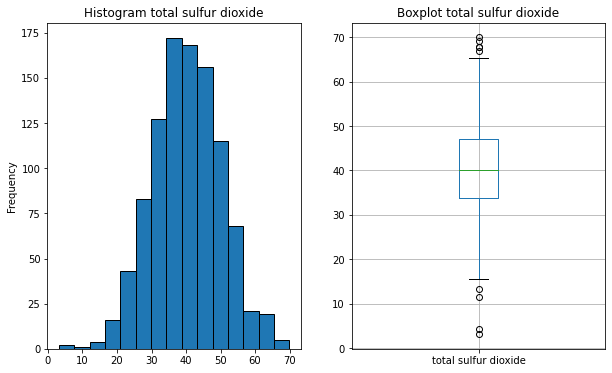

In [15]:
plot_attribute(data, 'total sulfur dioxide')

## 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. 

Gunakan normality test yang dikaitkan dengan histogram plot

## Histogram plot

Melakukan plotting sebuah kurva normal yang berdasarkan histogram.

Bila diamati sekilas, terdapat 4 atribut yang diperkirakan tidak berdistribusi normal, volatile acidity, residual sugar, pH, dan sulphates. Hal tersebut juga dapat diamati pada grafik dibawah, dimana terdapat perbedaan yang cukup terlihat antara kurva normal nya dan histogram dari atribut tersebut.

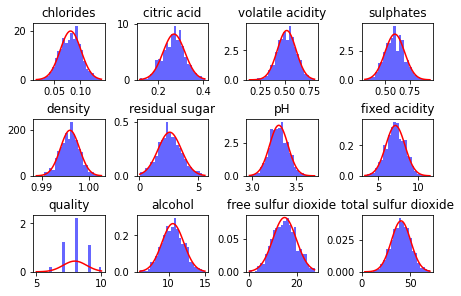

In [16]:
from scipy.stats import norm
 
fig, axes = plt.subplots(3, 4, constrained_layout=True)
columns = list(data.columns)

for i in range(3):
    for j in range(4):
        column_name = columns[4*i+j]
        axes[i,j].set_title(column_name)
        axes[i,j].hist(data[column_name], density=True, alpha=0.6, color='b', bins=25)
        x_min = data[column_name].min()
        x_max = data[column_name].max()

        x = np.linspace(x_min, x_max, 100)
        y = norm.pdf(x, loc=data[column_name].mean(), scale=data[column_name].std())
        axes[i,j].plot(x, y, color='r')
 
# Depict illustration
plt.show()

Setelah melakukan normality test, diperoleh bahwa dengan nilai signifikansi 0.05 terdapat dua kolom yang tidak berdistribusi normal, yaitu volatile acidity dan free sulfur dioxide. Library yang kami gunakan untuk normal test menggunakan metode D’Agostino dan Pearson’s, yang memanfaatkan nilai skewness dan kurtosis untuk menentukan kenormalan suatu sampel atau populasi.

In [17]:

p_values = [st.normaltest(data[column_name])[1] for column_name in data.columns]
is_normals = [p >= 0.05 for p in p_values]

normality = pd.DataFrame(data={
    "p_value": p_values,
    "is_normal": is_normals
}, index=list(data.columns))

normality

,p_value,is_normal
chlorides,0.170483,True
citric acid,0.681690,True
volatile acidity,0.022581,False
sulphates,0.138843,True
density,0.598523,True
residual sugar,0.224667,True
pH,0.136787,True
fixed acidity,0.930858,True
quality,0.388814,True
alcohol,0.679088,True


## 4. Melakukan test hipotesis 1 sampel
- a. Nilai rata-rata pH di atas 3.29?
- b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
- c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
- d. Nilai rata-rata total sulfur dioxide di bawah 35?
- e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

## Asumsi yang digunakan

Pada dataset ini, standar deviasi populasi tidak diketahui. Meskipun begitu, 
jumlah sampel pada data ini bisa dianggap cukup besar sedemikian sehingga
standar deviasi sampelnya bisa memberikan nilai yang mendekati standar deviasi
populasi dan bisa memberi pendekatan nilai z-score yang baik.

Fungsi pstdev merupakan fungsi yang menghitung standar deviasi populasi.
Rumusnya adalah

$$ stdev = \sqrt{\frac{\sum_{i}^{n} (x_i - \mu)^2}{N}}$$


Bedanya dengan rumus standar deviasi sampel terletak pada pembaginya. 
Pada standar deviasi sampel, kita membagi dengan banyaknya sampel dikurangi dengan satu.

## Fungsi untuk menghitung z-score

Untuk menghitung $Z$ score dari sebuah sampel yang diambil dari suatu populasi:
$$Z = \frac{x_i - \bar{x}}{\sqrt{\frac{\sigma^2}{n}}}$$
dimana $x$ : nilai observasi, $\bar{x}$ : nilai rata-rata sampel, $\sigma^2$ : variansi populasi, dan $n$ : jumlah sampel

Untuk menghitung $Z$ score dari suatu populasi:
$$Z = \frac{x - \mu}{\sqrt{\sigma^2}}$$
dimana $x$ : nilai observasi, $\mu$ : nilai rata-rata populasi, dan $\sigma^2$ : variansi populasi

In [18]:
from statistics import pstdev
from scipy.stats import norm

"""
population mean: x bar
h0: nilai hipotesis nol
population_stdev: stdev populasi
n_sample: banyak sampel
"""
def calculate_z_score(h0: float, population_stdev: float, n_samples: int, sample_mean: float) -> float:
    return (sample_mean - h0)*np.sqrt(n_samples)/population_stdev

"""
population mean: x bar
h0: nilai hipotesis nol
population_stdev: stdev populasi
n_sample: banyak sampel
"""
def calculate_z_score_alt(h0: float, population_stdev: float, population_mean: float) -> float:
    return (population_mean - h0)/population_stdev

## 4a. Apakah nilai rata-rata pH di atas 3.29?

### Penyelesaian

Untuk menentukan kebenaran dari hipotesa nilai rata-rata pH diatas 3.29, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu = 3.29$$
$$H_1 : \mu > 3.29$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : \mu > 3.29$ maka didapatkan daerah kritis $$Z > Z_\alpha = Z_{0.05} = 1.644$$

Dan nilai 
$$Z = 4.10$$ dan $$P(Z < 4.10) = 2.01 \times 10^{-5}$$

Sehingga, karena $Z = 4.10 > 1.644$ dan $P(Z < 4.10) = 2.01 \times 10^{-5} < \alpha = 0.05 $ maka Hipotesa null dapat ditolak

### Kesimpulan

Nilai rata-rata pH > 3.29

In [19]:
def problem_4a():
    print("""
    ------------ Hipotesa -----------------
    Apakah nilai rata-rata pH di atas 3.29?
    ---------------------------------------
    """)


    mean = data['pH'].mean()

        
    # Langkah 1 menentukan hipotesis nol
    # H0 adalah rata-rata kurang dari sama dengan 3.29

    # Langkah 2 menentukan hipotesis alternatif
    # H1 adalah rata-rata di atas 3.29

    target = 3.29

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05


    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # Perhatikan bahwa jumlah sampel cukup besar dan berdistribusi normal, 
    # sehingga kita bisa menggunakan z-test. 
    # Selain itu, kita bisa membuat aproksimasi untuk nilai standar
    # deviasi populasi.

    # daerah kritis: z > z_alpha
    z_alpha = norm.ppf(1-alpha)

    # Langkah 5 hitung nilai uji statistik (P(z>Z))
    z_score = calculate_z_score(target, pstdev(data['pH']), len(data['pH']), mean)
    p_value = 1 - norm.cdf(z_score) # right tailed
    variables = pd.DataFrame()
    variables['mean'] = pd.DataFrame([mean]) 
    variables['z-alpha'] = pd.DataFrame([round(z_alpha, 3)])
    variables['z-score'] = pd.DataFrame([round(z_score, 3)])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])

    # Langkah 6 ambil kesimpulan
    if z_score > z_alpha:
        print(f"Berdasarkan z-value, Hipotesis nol ditolak karena {z_score:.2f} > {z_alpha:.2f}")
    else:
        print("Berdasarkan z-value, Hipotesis nol gagal ditolak")

    if p_value < alpha:
        print(f"Berdasarkan tes signifikan, Hipotesis nol ditolak karena {p_value} < {alpha:.2f}")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    --------------- Kesimpulan --------------
    nilai rata-rata pH adalah lebih dari 3.29
    -----------------------------------------""")

    return variables

problem_4a()


    ------------ Hipotesa -----------------
    Apakah nilai rata-rata pH di atas 3.29?
    ---------------------------------------
    
Berdasarkan z-value, Hipotesis nol ditolak karena 4.11 > 1.64
Berdasarkan tes signifikan, Hipotesis nol ditolak karena 2.014291646990074e-05 < 0.05

    --------------- Kesimpulan --------------
    nilai rata-rata pH adalah lebih dari 3.29
    -----------------------------------------


,mean,z-alpha,z-score,p-value
0,3.30361,1.645,4.106,0.0


## 4b. Apakah Apakah nilai rata-rata Residual Sugar tidak sama dengan 2.50?

### Penyelesaian

Untuk menentukan kebenaran dari hipotesa nilai rata-rata Residual Sugar tidak sama dengan 2.50, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu =2.50 $$
$$H_1 : \mu \neq 2.50$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : \mu \neq 2.50$ maka didapatkan daerah kritis $$Z > Z_{\alpha / 2} = Z_{0.025} = 1.96$$ atau $$Z < Z_{\alpha / 2} = -Z_{0.025} = -1.96$$

Dan nilai 
$$Z = 2.149$$ dan $$P = 2 \times P(Z < -2.149) = 0.032$$

Sehingga, karena $Z = 2.149 > 1.96$ dan $P = 0.032 < \alpha = 0.05 $ maka Hipotesa null dapat ditolak

### Kesimpulan

Nilai rata-rata Residual Sugar $\neq$ 2.50

In [20]:

def problem_4b():
    print("""
    ------------------------- Hipotesa --------------------------
    Apakah nilai rata-rata Residual Sugar tidak sama dengan 2.50?
    -------------------------------------------------------------
    """)

    mean = data['residual sugar'].mean()

    # Langkah 1 menentukan hipotesis nol
    # H0 adalah rata-rata sama dengan 2.5

    # Langkah 2 menentukan hipotesis alternatif
    # H1 adalah rata-rata tidak sama dengan 2.5

    target = 2.5

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # Perhatikan bahwa jumlah sampel cukup besar dan berdistribusi normal, 
    # sehingga kita bisa menggunakan z-test. 
    # Selain itu, kita bisa membuat aproksimasi untuk nilai standar
    # deviasi populasi.

    # daerah kritis: z > z_alpha/2 atau z < -z_alpha/2
    z_alpha_low = norm.ppf(alpha/2)
    z_alpha_high = norm.ppf(1-(alpha/2))

    # Langkah 5 hitung nilai uji statistik
    z_score = calculate_z_score(target, pstdev(data['residual sugar']), len(data['residual sugar']), mean)
    p_value = 2*norm.cdf(-z_score) # two tailed

    variables = pd.DataFrame()
    variables['mean'] = pd.DataFrame([mean]) 
    variables['z-alpha-low'] = pd.DataFrame([round(z_alpha_low, 3)])
    variables['z-alpha-high'] = pd.DataFrame([round(z_alpha_high, 3)])
    variables['z-score'] = pd.DataFrame([round(z_score, 3)])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])

    # Langkah 6 ambil kesimpulan
    if z_score > z_alpha_high or z_score < z_alpha_low:
        print(f"Berdasarkan z-value, Hipotesis nol ditolak karena {z_score:.2f} > {z_alpha_high:.2f} atau {z_score:.2f} < {z_alpha_low:.2f}")
    else:
        print("Berdasarkan z-value, Hipotesis nol gagal ditolak karena nilai z tidak berada dalam daerah kritis")

    if p_value < alpha:
        print(f"Berdasarkan tes signifikan, Hipotesis nol ditolak karena {p_value:.3f} < 0.05")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    ------------------ Kesimpulan ----------------
    rata-rata residual sugar tidak sama dengan 2.5
    ----------------------------------------------""")

    return variables

problem_4b()


    ------------------------- Hipotesa --------------------------
    Apakah nilai rata-rata Residual Sugar tidak sama dengan 2.50?
    -------------------------------------------------------------
    
Berdasarkan z-value, Hipotesis nol ditolak karena 2.15 > 1.96 atau 2.15 < -1.96
Berdasarkan tes signifikan, Hipotesis nol ditolak karena 0.032 < 0.05

    ------------------ Kesimpulan ----------------
    rata-rata residual sugar tidak sama dengan 2.5
    ----------------------------------------------


,mean,z-alpha-low,z-alpha-high,z-score,p-value
0,2.567104,-1.96,1.96,2.149,0.032


## 4c. Apakah nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

### Penyelesaian

Untuk menentukan kebenaran dari hipotesa nilai rata-rata 150 baris pertama kolom Sulphates tidak sama dengan 0.65, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \bar{x} = 0.65$$
$$H_1 : \bar{x} \neq 0.65$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : \bar{x} \neq 0.65$ maka didapatkan daerah kritis $$Z > Z_{\alpha / 2} = Z_{0.025} = 1.96$$ atau $$Z < Z_{\alpha / 2} = -Z_{0.025} = -1.96$$

Dan nilai 
$$Z = -6.273$$ dan $$P(Z < -6.273) = 3.54 \times 10^{-10}$$

Sehingga, karena $Z = -6.273 < -1.96$ dan $P(Z < -6.273) = 3.54 \times 10^{-10} < \alpha = 0.05 $ maka Hipotesa null dapat ditolak

### Kesimpulan

Nilai rata-rata 150 baris pertama kolom Sulphates $\neq$ 0.65

In [21]:
def problem_4c():
    print("""
    ----------------------------- Hipotesa -----------------------------
    Apakah nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
    --------------------------------------------------------------------
    """)

    mean_sample = data['sulphates'][:150].mean()
    mean_population = data['sulphates'].mean()

    # Langkah 1 menentukan hipotesis nol
    # H0 adalah rata-rata sama dengan 0.65

    # Langkah 2 menentukan hipotesis alternatif
    # H1 adalah rata-rata tidak sama dengan 0.65

    target = 0.65

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # Perhatikan bahwa jumlah sampel cukup besar dan berdistribusi normal, 
    # sehingga kita bisa menggunakan z-test. 
    # Selain itu, kita bisa membuat aproksimasi untuk nilai standar
    # deviasi populasi.

    # daerah kritis: z > z_alpha/2 atau z < -z_alpha/2
    z_alpha_low = norm.ppf(alpha/2)
    z_alpha_high = norm.ppf(1-(alpha/2))

    # Langkah 5 hitung nilai uji statistik
    # data sulphate keseluruhan dianggap data populasi sehingga nilai stdev dan rata-rata
    # menggunakan data keseluruhan, bukan sampel
    population_stdev = pstdev(data['sulphates']) # stdev populasi
    z_score = calculate_z_score(target, population_stdev, 150, mean_population)
    p_value = 2*norm.cdf(z_score) # two tailed

    variables = pd.DataFrame()
    variables['mean-sample'] = pd.DataFrame([round(mean_sample, 3)])
    variables['mean-population'] = pd.DataFrame([round(mean_population, 3)])
    variables['z-alpha-low'] = pd.DataFrame([round(z_alpha_low, 3)])
    variables['z-alpha-high'] = pd.DataFrame([round(z_alpha_high, 3)])
    variables['z-score'] = pd.DataFrame([round(z_score, 3)])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])

    # Langkah 6 ambil kesimpulan
    if z_score > z_alpha_high or z_score < z_alpha_low:
        print(f"Berdasarkan z-value, Hipotesis nol ditolak karena {z_score:.2f} > {z_alpha_high:.2f} atau {z_score:.2f} < {z_alpha_low:.2f}")
    else:
        print("Berdasarkan z-value, Hipotesis nol gagal ditolak karena nilai z tidak berada dalam daerah kritis")

    if p_value < alpha:
        print(f"Berdasarkan tes signifikan, Hipotesis nol ditolak karena {p_value} < 0.05")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    ---------------------- Kesimpulan -------------------
    rata-rata sulphates pada 150 baris pertama bukan 0.65
    -----------------------------------------------------""")

    return variables

problem_4c()


    ----------------------------- Hipotesa -----------------------------
    Apakah nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
    --------------------------------------------------------------------
    
Berdasarkan z-value, Hipotesis nol ditolak karena -6.27 > 1.96 atau -6.27 < -1.96
Berdasarkan tes signifikan, Hipotesis nol ditolak karena 3.54846553131317e-10 < 0.05

    ---------------------- Kesimpulan -------------------
    rata-rata sulphates pada 150 baris pertama bukan 0.65
    -----------------------------------------------------


,mean-sample,mean-population,z-alpha-low,z-alpha-high,z-score,p-value
0,0.606,0.598,-1.96,1.96,-6.273,0.0


## 4d. Apakah nilai rata-rata total sulfur dioxide di bawah 35?

### Penyelesaian

Untuk menentukan kebenaran dari hipotesa nilai rata-rata total sulfur dioxide di bawah 35, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu = 35$$
$$H_1 : \mu < 35$$

dengan tingkat signifikansi $\alpha = 0.05$

Dengan hipotesa alternatif $H_1 : \mu < 35$ maka didapatkan daerah kritis $$Z < - Z_{\alpha} = - Z_{0.05} = -1.645$$

Dan nilai 
$$Z = 16.795$$ dan $$P(Z < 16.795) = 1$$

Sehingga, karena $Z = 16.795 \nless -1.645$ dan $P(Z < 16.795) = 1 \nless \alpha = 0.05 $ maka Hipotesa null gagal ditolak

### Kesimpulan

Nilai rata-rata total sulfur dioxide tidak dapat disimpulkan di bawah 35

In [22]:
def problem_4d():
    print("""
    ----------------------- Hipotesa -----------------------
    Apakah nilai rata-rata total sulfur dioxide di bawah 35?
    --------------------------------------------------------
    """)

    mean = data['total sulfur dioxide'].mean()

    target = 35
    # Langkah 1 Menentukan H0 : rata-rata total sulfur dioxide = 35
    # Langkah 2 Menentukan H1 : rata-rata total sulfur dioxide < 35

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05
    
    
    # Cek Z untuk mean sample
    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # Perhatikan bahwa jumlah sampel cukup besar dan berdistribusi normal, 
    # sehingga kita bisa menggunakan z-test. 
    # Selain itu, kita bisa membuat aproksimasi untuk nilai standar
    # deviasi populasi yang didekati oleh sampel yang berjumlah besar.
    z_alpha = norm.ppf(1-alpha)

    # Langkah 5 hitung nilai uji statistik
    # data sulfur dioxide keseluruhan dianggap data populasi sehingga nilai stdev dan rata-rata
    # menggunakan data keseluruhan, bukan sampel
    z_score = calculate_z_score(target, pstdev(data['total sulfur dioxide']), len(data['total sulfur dioxide']), mean)
    p_value = norm.cdf(z_score)

    variables = pd.DataFrame()
    variables['mean'] = pd.DataFrame([mean]) 
    variables['z-alpha'] = pd.DataFrame([round(z_alpha, 3)])
    variables['z-score'] = pd.DataFrame([round(z_score, 3)])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])

    # Jika Z < - Zalpha, maka tolak H0
    if z_score < -1 * z_alpha:
        print(f"Berdasarkan z-value, Hipotesis nol ditolak karena {z_score:.2f} < {z_alpha:.2f}")
    else:
        print("Berdasarkan z-value, Hipotesis nol gagal ditolak karena nilai z tidak berada dalam daerah kritis")
    
    # Tes signifikan
    
    # Langkah 6 ambil kesimpulan
    if p_value < alpha:
        print(f"Berdasarkan tes signifikan, Hipotesis nol ditolak karena {p_value} < 0.05")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    ---------------------------- Kesimpulan -------------------------
    rata-rata total sulfur dioxide tidak bisa disimpulkan di bawah 35
    -----------------------------------------------------------------""")

    return variables
problem_4d()


    ----------------------- Hipotesa -----------------------
    Apakah nilai rata-rata total sulfur dioxide di bawah 35?
    --------------------------------------------------------
    
Berdasarkan z-value, Hipotesis nol gagal ditolak karena nilai z tidak berada dalam daerah kritis
Berdasarkan tes signifikan, Hipotesis nol gagal ditolak

    ---------------------------- Kesimpulan -------------------------
    rata-rata total sulfur dioxide tidak bisa disimpulkan di bawah 35
    -----------------------------------------------------------------


,mean,z-alpha,z-score,p-value
0,40.29015,1.645,16.795,1.0


## 4e. Apakah proporsi nilai total Sulfur Dioxide yang lebih dari 40, adalah tidak sama dengan 50%?

### Penyelesaian

Untuk menentukan kebenaran dari hipotesa nilai proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : p = 0.5$$
$$H_1 : p \neq 0.5$$

dengan tingkat signifikansi $\alpha = 0.05$

Didapatkan daerah kritis 
$$Z > Z_{\alpha / 2} = Z_{0.025} = 1.96$$ atau $$Z < Z_{\alpha / 2} = -Z_{0.025} = -1.96$$

dari Sampel, ditemukan bahwa jumlah nilai total sulfur dioxide yang berada diatas 40 adalah 512

Dengan tes statistik:

$$
\begin{aligned}
Z   &= \frac{\bar{x} - \mu}{\sigma} \\
    &= \frac{\bar{x} - np}{\sqrt{npq}} \\
    &= \frac{512 - 1000 \times 0.5}{\sqrt{1000 \times 0.5 \times 0.5}} \\
    &= \frac{12}{15.811} = 0.759

\end{aligned}
$$
dan
$$
\begin{aligned}
P   & = 2 \times P(X > 512, p = 0.5) \\
    & = 2 \times (1 - P(X \leq 512, p = 0.5)) \\
    & = 2 \times (1 - \sum_{0}^{512} b(x; 1000; 0.5) \\
    & = 2 \times (1 - 0.7854) \\
    & = 2 \times 0.2146 = 0.4292
\end{aligned}
$$
sama dengan 
$$
\begin{aligned}
P   &= 2 \times P(Z > 0.759)\\
    &= 2 \times (1 - P(Z \leq 0.759))\\
    &= 2 \times (1 - 0.776073)\\
    &= 2 \times 0.223927 = 0.447854
\end{aligned}
$$

Sehingga, karena $Z = 0.759 \nless -1.96$ dan $Z = 0.759 \ngtr 1.96$ dan $P \approx 0.43 \nless \alpha = 0.05 $ maka Hipotesa null gagal ditolak

### Kesimpulan

Proporsi nilai total sulfur dioxide yang yang lebih dari 40 sama dengan 50%

In [23]:
# Bagian 4e
import scipy
def b(x, n, p):
    return scipy.special.comb(n, x) * p**x * (1-p)**(n-x)

def problem_4e():
    print("""
    ----------------------------------------- Hipotesa -----------------------------------------
    Apakah proporsi nilai total Sulfur Dioxide yang lebih dari 40, adalah tidak sama dengan 50%?
    --------------------------------------------------------------------------------------------
    """)

    target = 40
    
    # Langkah 1 Menentukan H0 : proporsi nilai total sulfur dioxide yang lebih dari 40 = 0.5
    # Langkah 2 Menentukan H1 : proporsi nilai total sulfur dioxide yang lebih dari 40 != 0.5

    # Langkah 3 Menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Jumlah nilai yang berada di > 40
    total_value_above_40 = len(data.loc[data['total sulfur dioxide'] > target, 'total sulfur dioxide'])
    
    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # Perhatikan bahwa jumlah sampel cukup besar dan berdistribusi normal, 
    # sehingga kita bisa menggunakan z-test. 
    # Selain itu, kita bisa membuat aproksimasi untuk nilai standar
    # deviasi populasi.

    # daerah kritis: z > z_alpha/2 atau z < -z_alpha/2
    z_alpha_low = norm.ppf(alpha/2)
    z_alpha_high = norm.ppf(1-(alpha/2))

    # Langkah 5 hitung nilai uji statistik
    # Untuk Z score
    n = 1000
    p = 0.5
    q = 1 - p
    z_score = (total_value_above_40 - n*p) / np.sqrt(n*p*q)
    p_value_z = 2*(1-norm.cdf(z_score)) # two tailed

    sum_b = 0
    for i in range(1, 513):
        sum_b += b(i, n, p)

    p_value_b = 2 * (1-sum_b)

    avg_p_value = (p_value_z + p_value_b)/2

    variables = pd.DataFrame()
    variables['total-value-above-40'] = pd.DataFrame([total_value_above_40]) 
    variables['z-alpha-low'] = pd.DataFrame([round(z_alpha_low, 3)])
    variables['z-alpha-high'] = pd.DataFrame([round(z_alpha_high, 3)])
    variables['z-score'] = pd.DataFrame([round(z_score, 3)])
    variables['p-value-z'] = pd.DataFrame([round(p_value_z, 3)])
    variables['p-value-b'] = pd.DataFrame([round(p_value_b, 3)])
    variables['avg-p-value'] = pd.DataFrame([round(avg_p_value, 3)])


    # Langkah 6 ambil kesimpulan
    if z_score > z_alpha_high or z_score < z_alpha_low:
        print(f"Berdasarkan z-value, Hipotesis nol ditolak karena {z_score:.2f} > {z_alpha_high:.2f} atau {z_score:.2f} < {z_alpha_low:.2f}")
    else:
        print("Berdasarkan z-value, Hipotesis nol gagal ditolak karena nilai z tidak berada dalam daerah kritis")

    if avg_p_value < alpha:
        print(f"Berdasarkan tes signifikan, Hipotesis nol ditolak karena {avg_p_value} < 0.05")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    --------------------------------- Kesimpulan ------------------------------
    Proporsi nilai total sulfur dioxide yang yang lebih dari 40 sama dengan 50%
    ---------------------------------------------------------------------------""")

    return variables

problem_4e()


    ----------------------------------------- Hipotesa -----------------------------------------
    Apakah proporsi nilai total Sulfur Dioxide yang lebih dari 40, adalah tidak sama dengan 50%?
    --------------------------------------------------------------------------------------------
    
Berdasarkan z-value, Hipotesis nol gagal ditolak karena nilai z tidak berada dalam daerah kritis
Berdasarkan tes signifikan, Hipotesis nol gagal ditolak

    --------------------------------- Kesimpulan ------------------------------
    Proporsi nilai total sulfur dioxide yang yang lebih dari 40 sama dengan 50%
    ---------------------------------------------------------------------------


,total-value-above-40,z-alpha-low,z-alpha-high,z-score,p-value-z,p-value-b,avg-p-value
0,512,-1.96,1.96,0.759,0.448,0.429,0.439


## 5. Melakukan test hipotesis 2 sampel
- a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
- b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
- c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
- d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
- e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

## Fungsi untuk menghitung t-score

Akan digunakan sebuah fungsi yang mengandung rumus:
$$
\begin{aligned}
t   & = \frac{(\bar{x_1} - \bar{x_2}) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} \\
\end{aligned}
$$
$$
\begin{aligned}
s^2_p   & = \frac{(n_1 - 1)s^2_1 + (n_2-1)s^2_2}{n_1 + n_2 -2} \\
\end{aligned}
$$

$$
\begin{aligned}
t'  & = \frac{(\bar{x}_1 - \bar{x}_2) - d_0}{\sqrt{s^2_1/n_1 + s^2_2/n_2}} \\
\end{aligned}
$$

$$
\begin{aligned}
    f   & = \frac{s^2_1}{s^2_2} \\
\end{aligned}
$$

$$
\begin{aligned}
Z   &= \frac{\hat{p_1} - \hat{p_2}}{\hat{p} \hat{q} (\frac{1}{n_1} + \frac{1}{n_2})} \\
\end{aligned}
$$

In [24]:
from scipy.stats import t
from scipy.stats import f

def calculate_t_score(x1bar:float, x2bar:float, d0:float, sp, n1, n2):
    return ((x1bar - x2bar) - d0)/(sp * np.sqrt(1/n1 + 1/n2))

def calculate_spsquared(n1, s12, n2, s22):
    return ((n1-1) *s12 + (n2-1) *s22)/(n1+n2-2)

def calculate_taccent_score(x1bar, x2bar, d0, s1, n1, s2, n2):
    return ((x1bar - x2bar) - d0)/(np.sqrt(s1**2/n1 + s2**2/n2))

def calculate_f_score(s12, s22):
    return s12/s22

def calculate_z_score_proportions(p1, p2, p, n1, n2):
    return (p1 - p2)/(p * (1-p) * (1/n1 + 1/n2))

## 5a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
### Penyelesaian

Untuk menentukan kebenaran dari hipotesa rata-rata kedua bagian sama, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu_1 - \mu_2 = 0$$
$$H_1 : \mu_1 - \mu_2 \neq 0$$

dengan tingkat signifikansi $\alpha = 0.05$

Didapatkan hasil pengolahan data:
$$
\begin{aligned}
\bar{x}_1 &= 7.15351 &
s_1 &= 1.20494
\end{aligned}
$$
$$
\begin{aligned}
\bar{x}_2 &= 7.15154 &
s_2 &= 1.19945
\end{aligned}
$$

Karena keduanya berasal dari populasi data yang sama, maka variansi populasi keduanya akan sama, tetapi tidak diketahui
$$ \sigma_1^2 = \sigma_2^2 = \sigma^2 $$

Dari kedua sampel, akan didapat derajat kebebasan $v$
$$
\begin{aligned}
v   &= n_1 + n_2 - 2\\
    &= 500 + 500 -2 \\
    &= 998
\end{aligned} 
$$

Akan didapatkan daerah kritis:

$$t < -t_{\alpha/2} \cup t > t_{\alpha/2}$$
$$t < -t_{0.025} \cup t > t_{0.025}$$
$$t < -1.962 \cup t > 1.962$$

Untuk pencarian nilai $t$, akan dihitung terlebih dahulu nilai *pooling estimator* $s_p^2$


$$
\begin{aligned}
s^2_p   & = \frac{(n_1 - 1)s^2_1 + (n_2-1)s^2_2}{n_1 + n_2 -2} \\
        & = \frac{(499)\times 1.452 + (499) \times 1.438}{998} \\
        & = 1.445
\end{aligned}
$$

Sehingga bisa dihitung untuk nilai $t$

$$
\begin{aligned}
t   & = \frac{(\bar{x_1} - \bar{x_2}) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} \\
    & = \frac{(7.153 - 7.151) - 0}{\sqrt{1.445} \sqrt{1/500 + 1/500}} \\
    & = 0.0263
\end{aligned}
$$

dan
$$
\begin{aligned}
P   & = P(T > 0.0263 \cap T < -0.0263) \\
    & = 2 \times P(T < -0.0263) \\
    & = 0.979
\end{aligned}
$$


Sehingga, karena $t = 0.0263 \nless -1.962$ dan $t = 0.0263 \ngtr 1.96$ dan $P = 0.979 \nless \alpha = 0.05 $ maka Hipotesa null gagal ditolak

### Kesimpulan

Rata-rata kedua bagian berbeda

In [25]:
# Bagian 5a
# Bila data kolom fixed acidity dibagi 2 sama rata, apakah rata-rata kedua bagian tersebut sama?

def problem_5a():
    print("""
    ------------------------------------------ Hipotesa ------------------------------------------
    Bila data kolom fixed acidity dibagi 2 sama rata, apakah rata-rata kedua bagian tersebut sama?
    ----------------------------------------------------------------------------------------------
    """)

    length_offset = int(len(data['fixed acidity']) / 2)
    data_1 = data['fixed acidity'][:length_offset]
    data_2 = data['fixed acidity'][length_offset:]
    mean_1 = round(data_1.mean(), 3)
    mean_2 = round(data_2.mean(), 3)
    std_1 = round(data_1.std(), 3)
    std_2 = round(data_2.std(), 3)

    degree_freedom = len(data_1) + len(data_2) - 2

    # Langkah 1 menentukan hipotesis nol
    # H0 adalah rata-rata bagian pertama - rata-rata bagian kedua = 0

    # Langkah 2 menentukan hipotesis alternatif
    # H1 adalah rata-rata bagian pertama - rata-rata bagian kedua tidak sama dengan nol

    difference = 0

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # daerah kritis: t > t_alpha/2 atau t < -t_alpha/2

    critical_region_low = -t.ppf(0.975, degree_freedom)
    critical_region_high = t.ppf(0.975, degree_freedom)

    spsquared = calculate_spsquared(len(data_1), std_1**2, len(data_2), std_2**2)

    t_score = round(calculate_t_score(mean_1, mean_2, difference, np.sqrt(spsquared), len(data_1), len(data_2)), 4)
    
    p_value = 2 * t.cdf(-t_score, degree_freedom)

    # Langkah 5 hitung nilai uji statistik

    # p_value = 2*norm.cdf(z_score if z_score < 0 else z_score * -1)

    # print(f"Nilai p-value {p_value}")

    variables = pd.DataFrame()
    variables['mean-1'] = pd.DataFrame([mean_1]) 
    variables['mean-2'] = pd.DataFrame([mean_2])
    variables['std-1'] = pd.DataFrame([std_1])
    variables['std-2'] = pd.DataFrame([std_2])
    variables['degree-freedom'] = pd.DataFrame([degree_freedom])
    variables['critical-region-low'] = pd.DataFrame([round(critical_region_low, 3)])
    variables['critical-region-high'] = pd.DataFrame([round(critical_region_high, 3)])
    variables['sp^2'] = pd.DataFrame([round(spsquared, 3)])
    variables['t-score'] = pd.DataFrame([t_score])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])


    # Langkah 6 ambil kesimpulan
    if t_score > critical_region_high or t_score < critical_region_low:
        print("Berdasarkan t-value, Hipotesis nol ditolak")
    else:
        print("Berdasarkan t-value, Hipotesis nol gagal ditolak")

    if p_value < alpha:
        print("Berdasarkan tes signifikan, Hipotesis nol ditolak")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    ----------------- Kesimpulan ---------------
    rata-rata kedua bagian fixed acidity berbeda
    --------------------------------------------""")
    return variables

problem_5a()


    ------------------------------------------ Hipotesa ------------------------------------------
    Bila data kolom fixed acidity dibagi 2 sama rata, apakah rata-rata kedua bagian tersebut sama?
    ----------------------------------------------------------------------------------------------
    
Berdasarkan t-value, Hipotesis nol gagal ditolak
Berdasarkan tes signifikan, Hipotesis nol gagal ditolak

    ----------------- Kesimpulan ---------------
    rata-rata kedua bagian fixed acidity berbeda
    --------------------------------------------


,mean-1,mean-2,std-1,std-2,degree-freedom,critical-region-low,critical-region-high,sp^2,t-score,p-value
0,7.154,7.152,1.205,1.199,998,-1.962,1.962,1.445,0.0263,0.979


## 5b. Bila kolom chlorides dibagi 2 sama rata, apakah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
### Penyelesaian

Untuk menentukan kebenaran dari hipotesa rata-rata bagian pertama > bagian akhir sebesar 0.001, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu_1 - \mu_2 = 0.001$$
$$H_1 : \mu_1 - \mu_2 \neq   0.001$$

dengan tingkat signifikansi $\alpha = 0.05$

Didapatkan hasil pengolahan data:
$$
\begin{aligned}
\bar{x}_1 &= 0.08140 &
s_1 &= 0.02017
\end{aligned}
$$
$$
\begin{aligned}
\bar{x}_2 &= 0.08099 &
s_2 &= 0.02007
\end{aligned}
$$

Karena keduanya berasal dari populasi data yang sama, maka variansi populasi keduanya akan sama, tetapi tidak diketahui
$$ \sigma_1^2 = \sigma_2^2 = \sigma^2 $$

Dari kedua sampel, akan didapat derajat kebebasan $v$
$$
\begin{aligned}
v   &= n_1 + n_2 - 2\\
    &= 500 + 500 -2 \\
    &= 998
\end{aligned} 
$$

Akan didapatkan daerah kritis:

$$t < -t_{\alpha/2} \cup t > t_{\alpha/2}$$
$$t < -t_{0.025} \cup t > t_{0.025}$$
$$t < -1.962 \cup t > 1.962$$

Untuk pencarian nilai $t$, akan dihitung terlebih dahulu nilai *pooling estimator* $s_p^2$


$$
\begin{aligned}
s^2_p   & = \frac{(n_1 - 1)s^2_1 + (n_2-1)s^2_2}{n_1 + n_2 -2} \\
        & = \frac{(499)\times 0.0004068 + (499) \times 0.0004028}{998} \\
        & = 0.0004048
\end{aligned}
$$

Sehingga bisa dihitung untuk nilai $t$

$$
\begin{aligned}
t   & = \frac{(\bar{x_1} - \bar{x_2}) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} \\
    & = \frac{(0.08140 - 0.08099) - 0.001}{\sqrt{0.0004048} \sqrt{1/500 + 1/500}} \\
    & = -0.464
\end{aligned}
$$

dan
$$
\begin{aligned}
P   & = P(T > 0.464 \cap T < -0.464) \\
    & = 2 \times P(T < -0.464) \\
    & = 0.643
\end{aligned}
$$


Sehingga, karena $t = -0.464 \nless -1.962$ dan $t = -0.464 \ngtr 1.96$ dan $P = 0.643 \nless \alpha = 0.05 $ maka Hipotesa null gagal ditolak

### Kesimpulan

Rata-rata bagian pertama lebih besar dari bagian kedua sebesar 0.001

In [26]:
# Bagian 5b
# Bila kolom chlorides dibagi 2 sama rata, apakah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

def problem_5b():
    print("""
    -------------------------------------------------------- Hipotesa ----------------------------------------------------
    Bila kolom chlorides dibagi 2 sama rata, apakah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
    ----------------------------------------------------------------------------------------------------------------------
    """)
    length_offset = int(len(data['chlorides']) / 2)
    data_1 = data['chlorides'][:length_offset]
    data_2 = data['chlorides'][length_offset:]
    mean_1 = round(data_1.mean(), 5)
    mean_2 = round(data_2.mean(), 5)
    std_1 = round(data_1.std(), 5)
    std_2 = round(data_2.std(), 5)

    # print(f"Nilai rata-rata potongan sampel bagian pertama {mean_lower}")
    # print(f"Nilai rata-rata potongan sampel bagian kedua {mean_upper}")

    degree_freedom = len(data_1) + len(data_2) - 2

    # Langkah 1 menentukan hipotesis nol
    # H0 adalah rata-rata bagian pertama - rata-rata bagian kedua = 0.001

    # Langkah 2 menentukan hipotesis alternatif
    # H1 adalah rata-rata bagian pertama - rata-rata bagian kedua != 0.001

    difference = 0.001

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # daerah kritis: t > t_alpha/2 dan t < -t_alpha/2

    mean_difference = mean_1 - mean_2
    critical_region_low = -t.ppf(0.975, degree_freedom)
    critical_region_high = t.ppf(0.975, degree_freedom)
    spsquared = calculate_spsquared(len(data_1), std_1**2, len(data_2), std_2**2)

    # Langkah 5 hitung nilai uji statistik
    t_score = round(calculate_t_score(mean_1, mean_2, difference, np.sqrt(spsquared), len(data_1), len(data_2)), 4)
    p_value = 2 * t.cdf(t_score, degree_freedom)

    variables = pd.DataFrame()
    variables['mean-1'] = pd.DataFrame([mean_1]) 
    variables['mean-2'] = pd.DataFrame([mean_2])
    variables['std-1'] = pd.DataFrame([std_1])
    variables['std-2'] = pd.DataFrame([std_2])
    variables['degree-freedom'] = pd.DataFrame([degree_freedom])
    variables['critical-region-low'] = pd.DataFrame([round(critical_region_low, 3)])
    variables['critical-region-high'] = pd.DataFrame([round(critical_region_high, 3)])
    variables['sp^2'] = pd.DataFrame([round(spsquared, 7)])
    variables['t-score'] = pd.DataFrame([round(t_score, 3)])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])


    # Langkah 6 ambil kesimpulan
    if t_score > critical_region_high or t_score < critical_region_low:
        print("Berdasarkan t-value, Hipotesis nol ditolak")
    else:
        print("Berdasarkan t-value, Hipotesis nol gagal ditolak")

    if p_value < alpha:
        print("Berdasarkan tes signifikan, Hipotesis nol ditolak")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    ------------------------------ Kesimpulan -----------------------------
    rata-rata chlorides bagian awal lebih besar 0.001 daripada bagian akhir
    -----------------------------------------------------------------------""")
    return variables

problem_5b()


    -------------------------------------------------------- Hipotesa ----------------------------------------------------
    Bila kolom chlorides dibagi 2 sama rata, apakah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
    ----------------------------------------------------------------------------------------------------------------------
    
Berdasarkan t-value, Hipotesis nol gagal ditolak
Berdasarkan tes signifikan, Hipotesis nol gagal ditolak

    ------------------------------ Kesimpulan -----------------------------
    rata-rata chlorides bagian awal lebih besar 0.001 daripada bagian akhir
    -----------------------------------------------------------------------


,mean-1,mean-2,std-1,std-2,degree-freedom,critical-region-low,critical-region-high,sp^2,t-score,p-value
0,0.0814,0.08099,0.02017,0.02007,998,-1.962,1.962,0.000405,-0.464,0.643


## 5c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
### Penyelesaian

Untuk menentukan kebenaran dari hipotesa rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \mu_v - \mu_s = 0$$
$$H_1 : \mu_v - \mu_s \neq 0$$

$v$ : volatile acidity $s$ : sulphates

dengan tingkat signifikansi $\alpha = 0.05$

Didapatkan hasil pengolahan data:
$$
\begin{aligned}
\bar{x}_v &= 0.501424 &
s_v &= 0.08339
\end{aligned}
$$
$$
\begin{aligned}
\bar{x}_s &= 0.5768 &
s_s &= 0.11603
\end{aligned}
$$

Dari kedua sampel, akan didapat derajat kebebasan $v$
$$
\begin{aligned}
v   &= n_v + n_s - 2\\
    &= 25 + 25 -2 \\
    &= 48
\end{aligned} 
$$

Akan didapatkan daerah kritis:

$$t < -t_{\alpha/2} \cup t > t_{\alpha/2}$$
$$t < -t_{0.025} \cup t > t_{0.025}$$
$$t < -2.011 \cup t > 2.011$$

Karena tidak terdapat informasi mengenai variansi populasi dan keduanya berasal dari populasi yang berbeda 
$$ \sigma_v^2 \neq \sigma_s^2 $$ maka dapat dicari hampiran nilai t dengan hampiran nilai derajat kebebasan

$$\begin{aligned}
v   &= \frac{(s^2_v/n_v+s^2_s/n_s)^2}{(s^2_v/n_v)^2/(n_v-1) + (s^2_s/n_s)^2/(n_s-1)} \\
    &= 43.571
\end{aligned}
$$

Sehingga bisa dihitung untuk nilai $t$

$$
\begin{aligned}
t'  & = \frac{(\bar{x}_v - \bar{x}_s) - d_0}{\sqrt{s^2_v/n_v + s^2_s/n_s}} \\
    & = \frac{(0.501 - 0.577) - 0}{\sqrt{0.00695/25 + 0.013462/25}} \\
    & = -2.638
\end{aligned}
$$

dan
$$
\begin{aligned}
P   & = P(T > 2.638 \cap T < -2.638) \\
    & = 2 \times P(T > 2.638) \\
    & = 0.011
\end{aligned}
$$


Sehingga, karena $t = -2.638 < -2.011$ dan $P = 0.011 < \alpha = 0.05 $ maka Hipotesa null ditolak

### Kesimpulan

Rata-rata sampel 25 baris pertama kolom volatile acidity tidak sama dengan rata-rata 25 baris pertama kolom sulphates

In [27]:
# Bagian 5c

def problem_5c():
    print("""
    ---------------------------------------------------------- Hipotesa ------------------------------------------------------
    Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
    --------------------------------------------------------------------------------------------------------------------------
    """)

    volatile_acidity = data['volatile acidity'][:25]
    sulphates = data['sulphates'][:25]
    nva = len(volatile_acidity)
    ns = len(sulphates)
    mean_va = volatile_acidity.mean()
    mean_s = sulphates.mean()
    std_va = volatile_acidity.std()
    std_s = sulphates.std()
    degree_freedom = nva + ns - 2

    # Langkah 1 menentukan hipotesis nol
    # H0 adalah rata-rata 25 volatile acidity - rata-rata 25 sulphates = 0

    # Langkah 2 menentukan hipotesis alternatif
    # H0 adalah rata-rata 25 volatile acidity - rata-rata 25 sulphates != 0

    difference = 0

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # daerah kritis: t > t_alpha/2 dan t < -t_alpha/2

    critical_region_low = -t.ppf(0.975, degree_freedom)
    critical_region_high = t.ppf(0.975, degree_freedom)


    # Langkah 5 hitung nilai uji statistik
    t_score = round(calculate_taccent_score(mean_va, mean_s, difference, std_va, nva, std_s, ns), 4)
    p_value = 2 * t.cdf(t_score, degree_freedom)


    variables = pd.DataFrame()
    variables['mean-va'] = pd.DataFrame([mean_va]) 
    variables['mean-s'] = pd.DataFrame([mean_s])
    variables['std-va'] = pd.DataFrame([std_va])
    variables['std-s'] = pd.DataFrame([std_s])
    variables['degree-freedom'] = pd.DataFrame([degree_freedom])
    variables['critical-region-low'] = pd.DataFrame([round(critical_region_low, 3)])
    variables['critical-region-high'] = pd.DataFrame([round(critical_region_high, 3)])
    variables['t-score'] = pd.DataFrame([round(t_score, 3)])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])

    # Langkah 6 ambil kesimpulan
    if t_score > critical_region_high or t_score < critical_region_low:
        print("Berdasarkan t-value, Hipotesis nol ditolak")
    else:
        print("Berdasarkan t-value, Hipotesis nol gagal ditolak")

    if p_value < alpha:
        print("Berdasarkan tes signifikan, Hipotesis nol ditolak")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    -------------------------------------------- Kesimpulan ------------------------------------------
    rata-rata 25 baris pertama volatile acidity tidak sama dengan rata-rata 25 baris pertama sulphates
    --------------------------------------------------------------------------------------------------""")
    return variables

problem_5c()


    ---------------------------------------------------------- Hipotesa ------------------------------------------------------
    Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
    --------------------------------------------------------------------------------------------------------------------------
    
Berdasarkan t-value, Hipotesis nol ditolak
Berdasarkan tes signifikan, Hipotesis nol ditolak

    -------------------------------------------- Kesimpulan ------------------------------------------
    rata-rata 25 baris pertama volatile acidity tidak sama dengan rata-rata 25 baris pertama sulphates
    --------------------------------------------------------------------------------------------------


,mean-va,mean-s,std-va,std-s,degree-freedom,critical-region-low,critical-region-high,t-score,p-value
0,0.501424,0.5768,0.083393,0.116036,48,-2.011,2.011,-2.638,0.011


## 5d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
### Penyelesaian

Untuk menentukan kebenaran dari hipotesa Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : \sigma_1^2 - \sigma_2^2 = 0$$
$$H_1 : \sigma_1^2 - \sigma_2^2 \neq 0$$

$1$ : bagian awal, $2$ : bagian akhir

dengan tingkat signifikansi $\alpha = 0.05$

Didapatkan hasil pengolahan data:
$$
\begin{aligned}
n_1 &= 500 &
s_1^2 &= 0.94777
\end{aligned}
$$
$$
\begin{aligned}
n_2 &= 500 &
s_2^2 &= 1.00612
\end{aligned}
$$

Untuk pencarian perbandingan rasio variansi antara dua sampel, maka akan digunakan uji statistik f


Akan didapat derajat kebebasan $v_1$ dan $v_2$ untuk setiap sampel:
$$
\begin{aligned}
v_1 &= n_1 -1\\
    &= 500 -1 \\
    &= 499
\end{aligned} 
$$
$$
\begin{aligned}
v_2 &= n_2 -1\\
    &= 500 -1 \\
    &= 499
\end{aligned} 
$$

Akan didapatkan daerah kritis menggunakan $\alpha$, $v_1$, $v_2$:

$$f < f_{1-\alpha/2}(v_1, v_2) \cup f > f_{\alpha/2}(v_1, v_2)$$
$$f < f_{0.975}(499,499) \cup f > f_{0.025}(499, 499)$$
$$f < 0.839 \cup f > 1.192$$

Lalu bisa dihitung untuk nilai $f$

$$
\begin{aligned}
    f   & = \frac{s^2_1}{s^2_2} \\
        & = \frac{0.94777}{1.00612} \\
        & = 0.942
\end{aligned}
$$

dan
$$
\begin{aligned}
P   & = 2 \times P(f < 0.942) \\
    & = 0.505
\end{aligned}
$$


Sehingga, karena $f = 0.942 \nless 0.839$ dan $f = 0.942 \ngtr 1.192$ dan $P = 0.505 \nless \alpha = 0.05 $ maka Hipotesa null gagal ditolak

### Kesimpulan

Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya

In [28]:
# Bagian 5d

def problem_5d():
    print("""
    ------------------------------------------- Hipotesa ----------------------------------------
    Benarkah Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
    ---------------------------------------------------------------------------------------------
    """)

    length_offset = int(len(data['residual sugar']) / 2)
    data_1 = data['residual sugar'][:length_offset]
    data_2 = data['residual sugar'][length_offset:]
    n_1 = len(data_1)
    n_2 = len(data_2)
    var_1 = data_1.var()
    var_2 = data_2.var()
    degree_freedom_1 = n_1 - 1
    degree_freedom_2 = n_2 - 1

    # Langkah 1 menentukan hipotesis nol
    # H0 adalah variansi bagian awal - variansi bagian akhir = 0

    # Langkah 2 menentukan hipotesis alternatif
    # H0 adalah variansi bagian awal - variansi bagian akhir != 0

    difference = 0

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # daerah kritis: f > f_alpha/2 dan f < -f_1-alpha/2

    # Rumus dibalik karena ppf merupakan invers 
    critical_region_low = f.ppf(alpha/2, degree_freedom_1, degree_freedom_2)
    critical_region_high = f.ppf(1-alpha/2, degree_freedom_1, degree_freedom_2)


    # Langkah 5 hitung nilai uji statistik
    f_score = calculate_f_score(var_1, var_2)
    if f_score < 1:
        p_value = 2 * f.cdf(f_score, degree_freedom_1, degree_freedom_2)
    else:
        p_value = 2 * (1 - f.cdf(f_score, degree_freedom_1, degree_freedom_2))


    variables = pd.DataFrame()
    variables['var-1'] = pd.DataFrame([var_1])
    variables['var-2'] = pd.DataFrame([var_2])
    variables['degree-freedom-1'] = pd.DataFrame([degree_freedom_1])
    variables['degree-freedom-2'] = pd.DataFrame([degree_freedom_2])
    variables['critical-region-low'] = pd.DataFrame([round(critical_region_low, 3)])
    variables['critical-region-high'] = pd.DataFrame([round(critical_region_high, 3)])
    variables['f-score'] = pd.DataFrame([round(f_score, 3)])
    variables['p-value'] = pd.DataFrame([round(p_value, 3)])

    # Langkah 6 ambil kesimpulan
    if f_score > critical_region_high or f_score < critical_region_low:
        print("Berdasarkan f-value, Hipotesis nol ditolak")
    else:
        print("Berdasarkan f-value, Hipotesis nol gagal ditolak")

    if p_value < alpha:
        print("Berdasarkan tes signifikan, Hipotesis nol ditolak")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    ------------------------------------- Kesimpulan ----------------------------------
    Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya
    -----------------------------------------------------------------------------------""")
    return variables

problem_5d()


    ------------------------------------------- Hipotesa ----------------------------------------
    Benarkah Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
    ---------------------------------------------------------------------------------------------
    
Berdasarkan f-value, Hipotesis nol gagal ditolak
Berdasarkan tes signifikan, Hipotesis nol gagal ditolak

    ------------------------------------- Kesimpulan ----------------------------------
    Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya
    -----------------------------------------------------------------------------------


,var-1,var-2,degree-freedom-1,degree-freedom-2,critical-region-low,critical-region-high,f-score,p-value
0,0.947771,1.006122,499,499,0.839,1.192,0.942,0.505


## 5e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?
### Penyelesaian

Untuk menentukan kebenaran dari hipotesa Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol, akan ditentukan hipotesa null dan hipotesa alternatif:

$$H_0 : p_1 - p_2 = 0$$
$$H_1 : p_1 - p_2 > 0$$

$1$ : bagian awal, $2$ : bagian akhir, dengan $p$ merupakan proporsi nilai yang lebih dari 7

dengan tingkat signifikansi $\alpha = 0.05$

Didapatkan hasil pengolahan data:
$$
\begin{aligned}
x_1 &=  495&
n_1 &= 500
\end{aligned}
$$
$$
\begin{aligned}
x_2 &=  495&
n_2 &= 500
\end{aligned}
$$

Sehingga didapatkan nilai $\hat{p}$:
$$
\begin{aligned}
\hat{p} &= \frac{x_1 + x_2}{n_1 + n_2} \\
        &= \frac{495 + 495}{500 + 500} \\
        &= \frac{990}{1000} \\
        &= 0.99
\end{aligned}
$$

Akan didapatkan daerah kritis :

$$Z > Z_\alpha = Z_{0.05} = 1.644 $$

dan
$$
\begin{aligned}
\hat{p_1}   &= \frac{495}{500} \\
            &= 0.99 \\
\hat{p_2}   &= \frac{495}{500} \\
            &= 0.99 \\
\end{aligned}
$$

Lalu bisa dihitung untuk nilai $Z$

$$
\begin{aligned}
Z   &= \frac{\hat{p_1} - \hat{p_2}}{\hat{p} \hat{q} (\frac{1}{n_1} + \frac{1}{n_2})} \\
    &= \frac{0.99 - 0.99}{0.99 \times 0.01 (\frac{1}{500} + \frac{1}{500})} \\
    &= 0
\end{aligned}
$$

dan
$$
\begin{aligned}
P   & =  P(Z \geq 0) \\
    & = 1 - P(Z < 0) \\
    & = 1 - 0.5 \\
    & = 0.5
\end{aligned}
$$


Sehingga, karena $Z = 0 \ngtr 1.644$ dan $P = 0.5 \nless \alpha = 0.05 $ maka Hipotesa null gagal ditolak

### Kesimpulan

Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, tidak lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol


In [29]:
# Bagian 5e

def problem_5e():
    print("""
    ------------------------------------------------------------------------ Hipotesa --------------------------------------------------------------------
    Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?
    ------------------------------------------------------------------------------------------------------------------------------------------------------
    """)

    target = 7

    length_offset = int(len(data['alcohol']) / 2)
    data_1 = data['alcohol'][:length_offset]
    data_2 = data['alcohol'][length_offset:]
    n_1 = len(data_1)
    n_2 = len(data_2)
    x_1 = len(data_1.loc[data['alcohol'][:length_offset] > target])
    x_2 = len(data_2.loc[data['alcohol'][length_offset:] > target])
    x = len(data.loc[data['alcohol'] > target])

    # Langkah 1 menentukan hipotesis nol
    # H0 adalah proporsi bagian awal - proporsi bagian akhir = 0

    # Langkah 2 menentukan hipotesis alternatif
    # H0 adalah proporsi bagian awal - proporsi bagian akhir != 0

    difference = 0

    # Langkah 3 menentukan tingkat signifikansi alpha
    alpha = 0.05

    # Langkah 4 uji statistik dan daerah kritis
    # Uji statistik
    # daerah kritis: z > z_alpha
    z_alpha = norm.ppf(1-alpha)

    # Langkah 5 hitung nilai uji statistik
    # data sulphate keseluruhan dianggap data populasi sehingga nilai stdev dan rata-rata
    # menggunakan data keseluruhan, bukan sampel
    z_score = calculate_z_score_proportions(x_1/n_1, x_2/n_2, x/(n_1 + n_2), n_1, n_2)
    p_value = norm.cdf(z_score) # two tailed


    variables = pd.DataFrame()
    variables['n-1'] = pd.DataFrame([n_1])
    variables['n-2'] = pd.DataFrame([n_2])
    variables['x-1'] = pd.DataFrame([x_1])
    variables['x-2'] = pd.DataFrame([x_2])
    variables['x'] = pd.DataFrame([x])
    variables['z-alpha'] = pd.DataFrame([z_alpha])
    variables['z-score'] = pd.DataFrame([z_score])
    variables['p-value'] = pd.DataFrame([p_value])

    # Langkah 6 ambil kesimpulan
    if z_score > z_alpha:
        print(f"Berdasarkan z-value, Hipotesis nol ditolak karena {z_score:.2f} > {z_alpha:.2f}")
    else:
        print("Berdasarkan z-value, Hipotesis nol gagal ditolak")

    if p_value < alpha:
        print(f"Berdasarkan tes signifikan, Hipotesis nol ditolak karena {p_value} < {alpha:.2f}")
    else:
        print("Berdasarkan tes signifikan, Hipotesis nol gagal ditolak")

    print("""
    ----------------------------------------------------------------------- Kesimpulan -----------------------------------------------------------------
    Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, tidak lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol
    ----------------------------------------------------------------------------------------------------------------------------------------------------
    """)
    
    return variables

problem_5e()


    ------------------------------------------------------------------------ Hipotesa --------------------------------------------------------------------
    Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?
    ------------------------------------------------------------------------------------------------------------------------------------------------------
    
Berdasarkan z-value, Hipotesis nol gagal ditolak
Berdasarkan tes signifikan, Hipotesis nol gagal ditolak

    ----------------------------------------------------------------------- Kesimpulan -----------------------------------------------------------------
    Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, tidak lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol
    -----------------------------------------------------------------------------------------------------------------

,n-1,n-2,x-1,x-2,x,z-alpha,z-score,p-value
0,500,500,495,495,990,1.644854,0.0,0.5
